## Import Required Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Import Data Set

df = pd.read_csv('LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Data Pre-Processing

#Get the number of Object type Variables 

obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [4]:
#Loan_ID is a completely unique column that is not related to anyother column
#We can drop the column 

df = df.drop(['Loan_ID'], axis =1 )

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Check for Null Values

df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#There are only 12 missing variables in the "Dependents Column"
#Select all variables in Data Frame except missing variables

df = df[df['Dependents'].notna()]

In [8]:
#Perform Data Imputations
#Mode Imputation on Binaries

for x in [df]: 
    x["Credit_History"] = x["Credit_History"].fillna(df.Credit_History.dropna().mode()[0])
    
    

In [9]:
#Mean Imputation on the Loan Amount and Loan_Amount_Terms
for x in [df]: 
    x["LoanAmount"] = x["LoanAmount"].fillna(df.LoanAmount.dropna().mean())
    x["Loan_Amount_Term"] = x["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.dropna().mean())
    

In [10]:
#Recheck Null Values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#Map Categorical Variables with Integers (Encoding)

for x in [df]:
    x["Gender"] = x["Gender"].map({"Male":0,"Female":1}).astype(int)
    x["Married"] = x["Married"].map({"No":0,"Yes":1}).astype(int)
    x["Education"] = x["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    x["Self_Employed"] = x["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    x["Credit_History"] = x["Credit_History"].astype(int)
    

In [12]:
# Categorical Variable with 3 fields
for x in [df]:
    x["Property_Area"] = x["Property_Area"].map({"Urban":0,"Rural":1,"Semiurban":2}).astype(int)

In [13]:
#Predicted - Dependent Variable
df['Loan_Status'] = df['Loan_Status'].map({"N":0,"Y":1}).astype(int)

## Exploratory Data Analysis

In [ ]:
#Univariate Analysis

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shash\anaconda3\lib\si

<AxesSubplot:xlabel='Dependents', ylabel='count'>

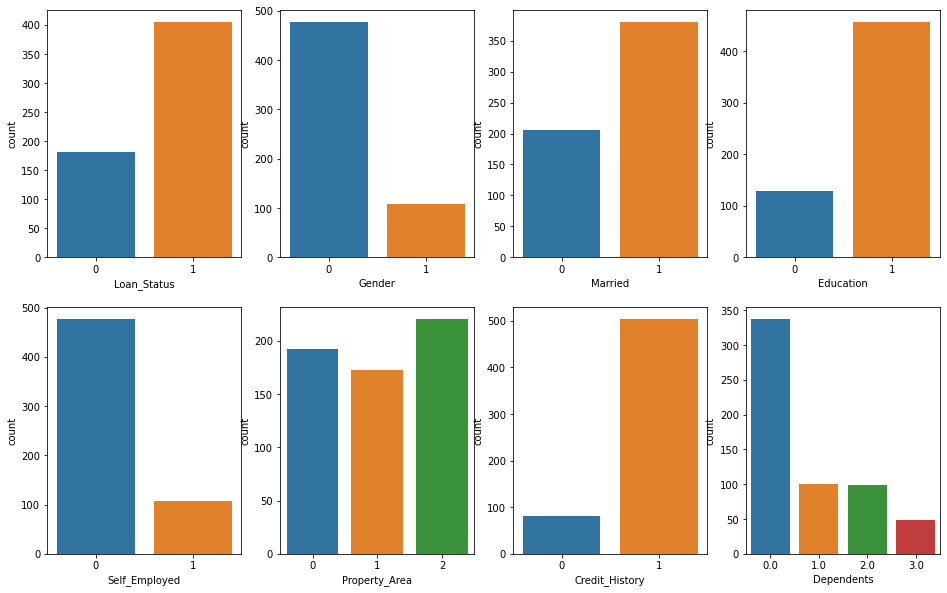

In [14]:
#Count Plots of Categorical Variables to understand charecterestics of customers

import seaborn as sns
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data = df, ax = ax[0][0])
sns.countplot('Gender', data = df, ax = ax[0][1])
sns.countplot('Married', data = df, ax = ax[0][2])
sns.countplot('Education', data = df, ax = ax[0][3])
sns.countplot('Self_Employed', data = df, ax = ax[1][0])
sns.countplot('Property_Area', data = df, ax = ax[1][1])
sns.countplot('Credit_History', data = df, ax = ax[1][2])
sns.countplot('Dependents', data = df, ax = ax[1][3])

### Univariate Analysis Observations

   1) More Loans are approved Vs Rejected

   2) Count of Male applicants is more than Female

   3) Count of Married applicant is more than Non-married

   4) Count of graduate is more than non-Graduate

   5) Count of self-employed is less than that of Non-Self-employed

   6) Maximum properties are located in Semiurban areas

   7) Credit History is present for many applicants

   8) The count of applicants with several dependents=0 is maximum.


<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

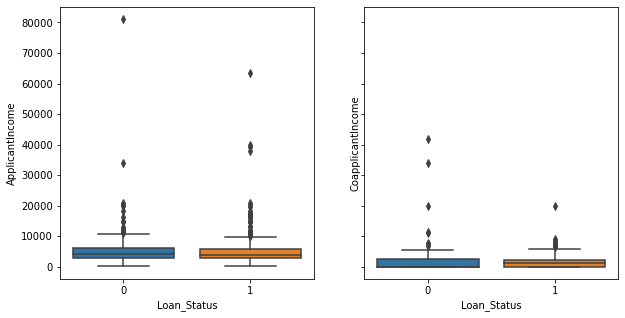

In [15]:
#Bivariate Analysis
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = df, ax=ax1 )
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = df, ax=ax2)

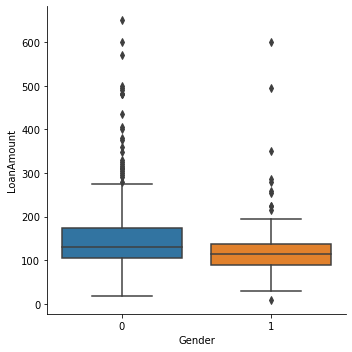

In [16]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = df , kind = 'box')

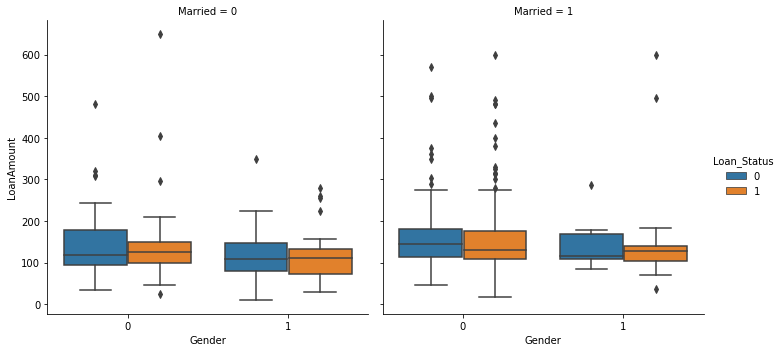

In [17]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = df, kind = 'box', hue = 'Loan_Status', col = 'Married')

### Bivariate Analysis Observations

1) Mean Applicant Income of 0 and 1 are almost the same (o: no,1: Yes) 
2) Mean Co-applicant Income of 1 is slightly more that 0 (o: no,1: Yes)
3) Average Loan Amount is higher in Males as compared to Females
4) Loan Amount Requested is higher in married individuals

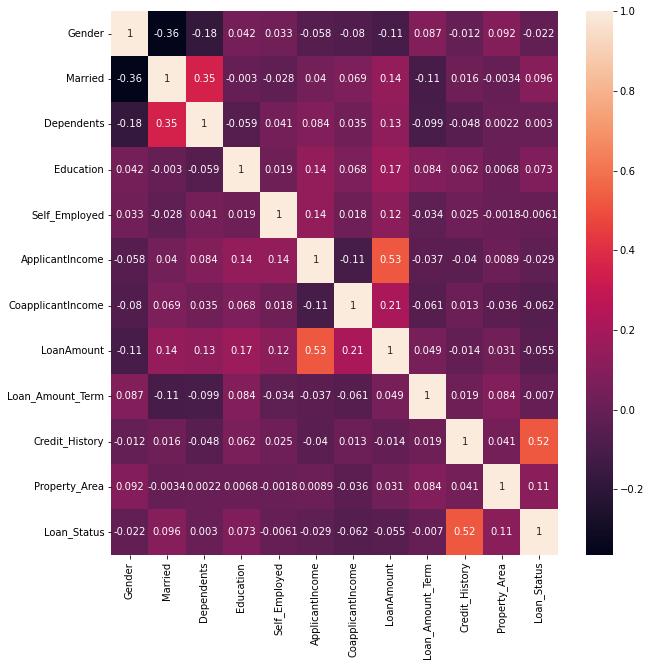

In [18]:
#Correlation Matrix 

plt.figure(figsize = (10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

## Feature Engineering 

In [19]:
#Create a Total Income Feature 

for i in [df]:
    i['Total_income'] = i['ApplicantIncome'] + i['CoapplicantIncome']

In [20]:
#Loan Amount per Total Income
#Loan Amount term per total income
#No of dependents grouped for loan amount

df['LoanAmount_per_Total_income'] = df['LoanAmount']/df['Total_income']
df['Loan_Amount_Term_per_Total_income'] = df['Loan_Amount_Term']/df['Total_income']
df['Dependents_wise_LoanAmount'] = df.groupby(['Dependents'])['LoanAmount'].transform('sum')


In [ ]:
#We have added 4 new features

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,LoanAmount_per_Total_income,Loan_Amount_Term_per_Total_income,Dependents_wise_LoanAmount
0,0,0,0.0,1,0,5849,0.0,145.399293,360.0,1,0,1,5849.0,0.024859,0.061549,46062.392226
1,0,1,1.0,1,0,4583,1508.0,128.000000,360.0,1,1,0,6091.0,0.021015,0.059104,15944.597173
2,0,1,0.0,1,1,3000,0.0,66.000000,360.0,1,0,1,3000.0,0.022000,0.120000,46062.392226
3,0,1,0.0,0,0,2583,2358.0,120.000000,360.0,1,0,1,4941.0,0.024287,0.072860,46062.392226
4,0,0,0.0,1,0,6000,0.0,141.000000,360.0,1,0,1,6000.0,0.023500,0.060000,46062.392226


In [22]:
df.shape

(586, 16)

In [23]:
X = df.drop('Loan_Status', axis = 1)
Y = df['Loan_Status']

## Building the Model

In [24]:
#Split Data into Training and Test Sets

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train,Y_Test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

In [25]:
#Fit the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [26]:
Y_Pred = classifier.predict(X_Test)


## Evaluating Model with a Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
accuracy_score(Y_Test, Y_Pred)

[[ 20  40]
 [  6 110]]


0.7386363636363636

## Optimization and Hyperparameter Tuning with Randomized Search Cross Validation

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(classifier, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_Train, Y_Train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8016260162601628
Best Hyperparameters: {'C': 10.190531951239569, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\shash\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shash\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueErro